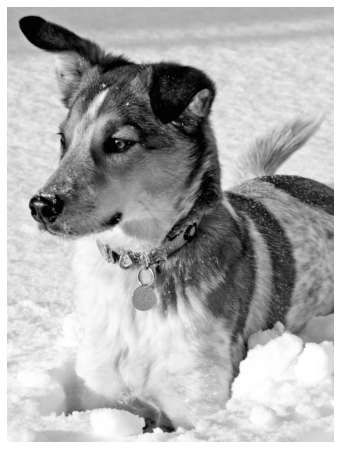

In [22]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import linalg
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('..','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [164]:
U, S, VT = np.linalg.svd(X,full_matrices=True)
S = np.diag(S)

In [7]:
utu = np.around(np.dot(np.transpose(U[:,0:10]),U[:,0:10]), decimals=0, out=None)
uut = np.dot(U,np.transpose(U))

In [8]:
print(utu)
print(uut)

[[ 1. -0. -0.  0.  0. -0. -0.  0. -0. -0.]
 [-0.  1.  0.  0.  0.  0.  0.  0. -0.  0.]
 [-0.  0.  1. -0.  0. -0.  0.  0.  0. -0.]
 [ 0.  0. -0.  1.  0. -0. -0. -0. -0. -0.]
 [ 0.  0.  0.  0.  1. -0. -0.  0. -0. -0.]
 [-0.  0. -0. -0. -0.  1.  0. -0.  0.  0.]
 [-0.  0.  0. -0. -0.  0.  1. -0.  0.  0.]
 [ 0.  0.  0. -0.  0. -0. -0.  1. -0.  0.]
 [-0. -0.  0. -0. -0.  0.  0. -0.  1.  0.]
 [-0.  0. -0. -0. -0.  0.  0.  0.  0.  1.]]
[[ 1.00000000e+00  6.93889390e-17 -2.77555756e-17 ...  7.22078647e-17
   1.07552856e-16 -2.34187669e-17]
 [ 6.93889390e-17  1.00000000e+00  6.93889390e-17 ...  5.20417043e-17
   2.16840434e-17 -3.12250226e-17]
 [-2.77555756e-17  6.93889390e-17  1.00000000e+00 ... -4.16333634e-17
   9.15066634e-17 -6.67868538e-17]
 ...
 [ 7.22078647e-17  5.20417043e-17 -4.16333634e-17 ...  1.00000000e+00
  -1.66533454e-16 -3.12250226e-17]
 [ 1.07552856e-16  2.16840434e-17  9.15066634e-17 ... -1.66533454e-16
   1.00000000e+00 -2.77555756e-17]
 [-2.34187669e-17 -3.12250226e-17 -6.67

2000

2000


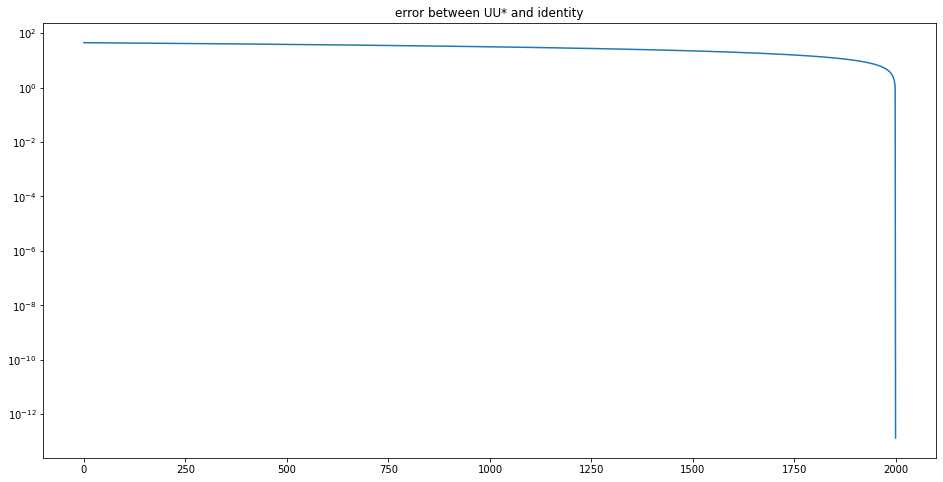

In [30]:
n = np.shape(uut)[0]
print(n)
err = np.zeros(n)
for i in range(n):
    uut = np.dot(U[:,0:i+1],np.transpose(U[:,0:i+1]))
    err[i] = linalg.norm(uut - np.identity(n), 'fro')

plt.semilogy(err)
plt.title('error between UU* and identity')
plt.show()

In [45]:
#1.2
print(np.shape(X))
m = np.shape(X)[1]
rec_err = np.zeros(m)


U, S, VT = np.linalg.svd(X,full_matrices=True)
S = np.diag(S)
for r in range(m):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    rec_err[r] = linalg.norm(Xapprox-X, 'fro')



(2000, 1500)


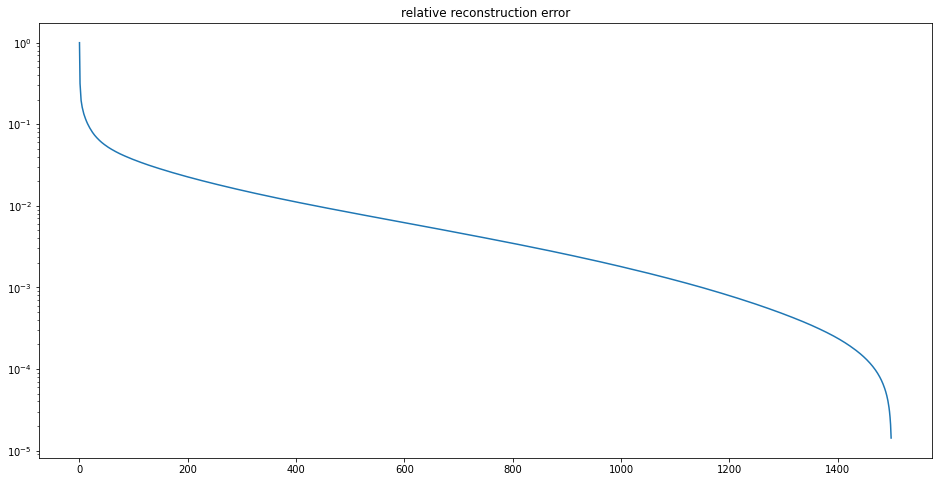

In [47]:

rela_err = rec_err/linalg.norm(X, 'fro')
plt.semilogy(rela_err)
plt.title('relative reconstruction error')
plt.show()

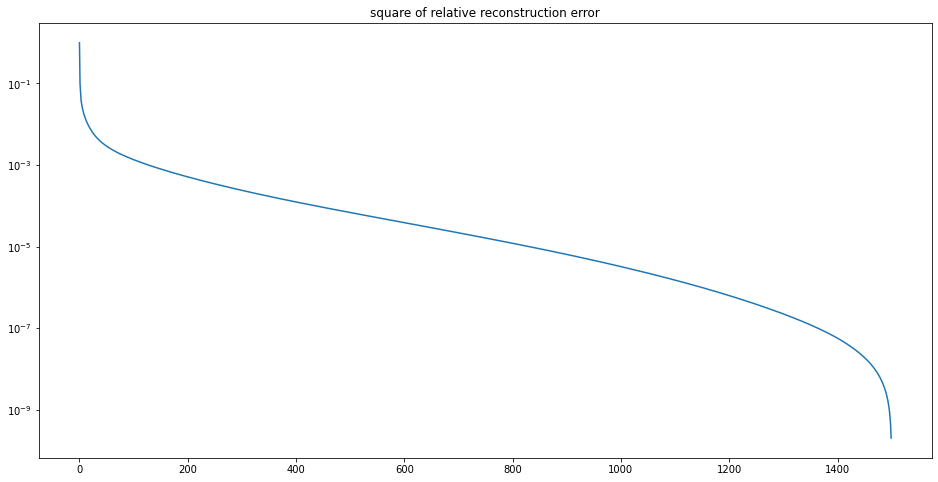

In [55]:
sqr_rela_err = np.power(rela_err,2)
plt.semilogy(sqr_rela_err)
plt.title('square of relative reconstruction error')
plt.show()

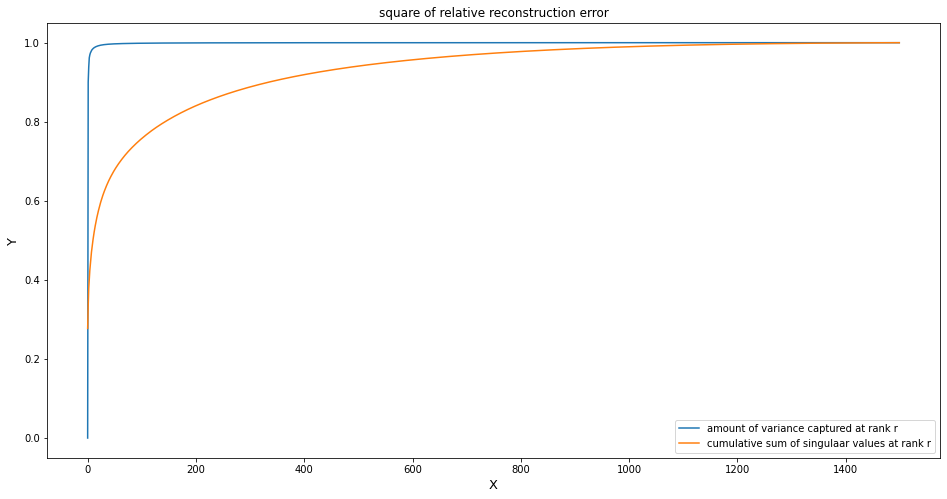

In [66]:
var_err = np.ones(len(sqr_rela_err))-sqr_rela_err
cum_singular = np.cumsum(np.diag(S))/np.sum(np.diag(S))
plt.plot(var_err, label = "amount of variance captured at rank r")
plt.plot(cum_singular, label = "cumulative sum of singulaar values at rank r")
plt.title('square of relative reconstruction error')
plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.legend()
plt.show()

In [76]:
for i in range(len(cum_singular)):
    if cum_singular[i]> 0.99:
        print(i)
        break
for i in range(len(var_err)):
    if var_err[i]> 0.99:
        print(i)
        break

1005
16


In [165]:
#1.3
import os
import scipy.io
mat_contents = scipy.io.loadmat(os.path.join('..','DATA','allFaces.mat'))
m = int(mat_contents['m'])
n = int(mat_contents['n'])
faces = mat_contents['faces']



In [91]:
#economy SVD
Uf, Sf, VTf = np.linalg.svd(faces,full_matrices=0)

(32256, 2410)
(2410,)
(2410, 2410)
(168, 192)


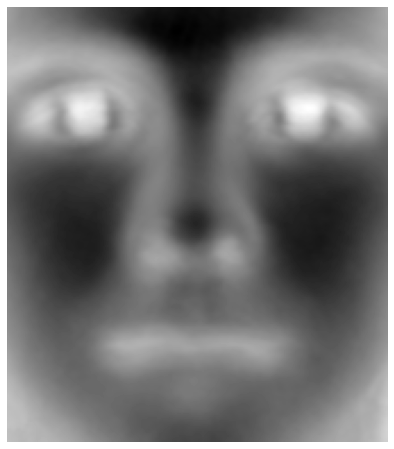

In [114]:
print(np.shape(Uf))
print(np.shape(Sf))
print(np.shape(VTf))

#show eigenfaces
eigenface = np.transpose(Uf[:,0])
face1 = np.reshape(eigenface,(m,n))
print(np.shape(face1))
img = plt.imshow(np.transpose(face1))
img.set_cmap('gray')
plt.axis('off')
plt.show()


In [115]:
XTX = np.dot(np.transpose(faces),faces)

In [130]:
#snapshots SVD
#np.shape(XTX)
eigdec = np.linalg.eig(XTX)
sigma_snap = eigdec[0]
V_snap = eigdec[1]
U_snap = np.dot(np.dot(faces, np.diag(sigma_snap)), np.linalg.inv(V_snap))


In [131]:
print(np.shape(sigma_snap))
print(np.shape(V_snap))
print(np.shape(U_snap))

(2410,)
(2410, 2410)
(32256, 2410)


(168, 192)


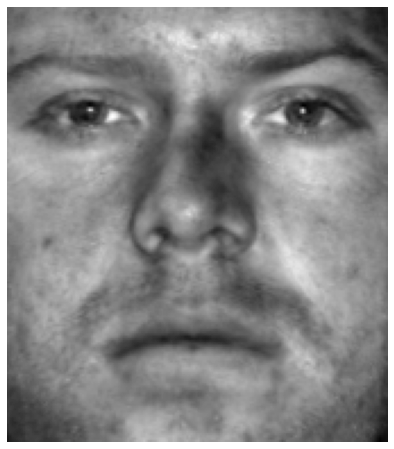

In [144]:
face2 = np.reshape(U_snap[:,10],(m,n))
print(np.shape(face2))
img = plt.imshow(np.transpose(face2))
img.set_cmap('gray')
plt.axis('off')
plt.show()